In [2]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

In [50]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [ ]:
# from base_classifier import BaseClassifier
# from Plotter import Plotter
# from skopt.space import Real, Categorical, Integer
# import xgboost as xgb


# class XGBoostClassifier(BaseClassifier):
#     def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
#         super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

#         self.model_ml = xgb.XGBClassifier
#         if params is None:
#             self.params = {
#                 'alpha': 0.2,
#                 'max_iter': 10000,
#                 #'tol': 0.001
#             }
#         if params_space is None:
#             self.params_space = {
#                 'objective'   : ['binary:logistic'],
#                 'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
#                 'learning_rate': (0.01, 0.1, 0.2),
#                 'max_depth': (3, 4, 5),
#                 'subsample': (0.8, 0.9, 1.0),
#                 'colsample_bytree': (0.8, 0.9, 1.0),
#                 'reg_alpha': (0, 0.1, 1.0),
#                 'reg_lambda': (0, 0.1, 1.0),
#                 #'gamma': (0.001, 0.01, 0.1, 1, 10),
#             }

In [51]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

In [6]:
#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [1]:
import pandas as pd

df_CN_results_ = pd.read_excel('CatBoost/results/df_CN_results.xlsx')


In [287]:
df_CN_results_

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,0,33.0,34.942691,25.089313,1.942691,-7.910687,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421
1,1,57.0,35.890313,42.206639,-21.109687,-14.793361,CUB_123_2_sub-10004,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738
2,2,32.0,43.794459,33.269340,11.794459,1.269340,CUB_123_2_sub-10005,32.0,1.0,10.0,NaN,0.7578,40.70,99.361739
3,3,21.0,24.766380,6.776773,3.766380,-14.223227,CUB_123_2_sub-10006,21.0,1.0,13.0,NaN,0.7578,40.70,99.561273
4,5,36.0,17.785710,9.944582,-18.214290,-26.055418,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1379,57.0,65.857471,72.109594,8.857471,15.109594,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221
1319,1380,48.0,52.626511,52.871694,4.626511,4.871694,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799
1320,1381,57.0,61.552807,67.821492,4.552807,10.821492,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446
1321,1382,69.0,50.110492,64.483754,-18.889508,-4.516246,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503


In [7]:
df_results_combined =df_CN_results_

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_38108\2207578703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [290]:
df_results_combined

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,brain_age_class
0,0,33.0,34.942691,25.089313,1.942691,-7.910687,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421,0
1,5,36.0,17.785710,9.944582,-18.214290,-26.055418,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132,0
2,8,24.0,31.089975,15.117433,7.089975,-8.882567,CUB_123_2_sub-100011,24.0,1.0,13.0,28.0,0.7578,40.70,99.610847,0
3,10,42.0,14.798436,10.985742,-27.201564,-31.014258,CUB_123_2_sub-100013,42.0,1.0,13.0,30.0,0.7578,40.70,99.757089,0
4,11,35.0,30.987418,22.436985,-4.012582,-12.563015,CUB_123_2_sub-100016,35.0,1.0,13.0,30.0,0.7578,40.70,98.628049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,1379,57.0,65.857471,72.109594,8.857471,15.109594,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221,1
689,1380,48.0,52.626511,52.871694,4.626511,4.871694,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799,1
690,1381,57.0,61.552807,67.821492,4.552807,10.821492,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446,1
691,1382,69.0,50.110492,64.483754,-18.889508,-4.516246,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503,0


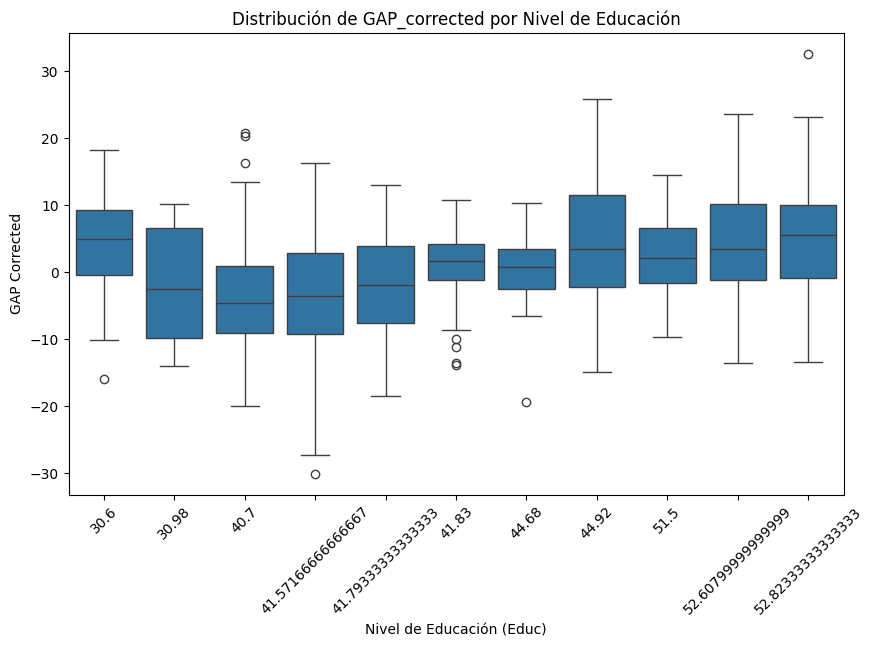

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GINI', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [11]:
df_concatenado

,Sex,Educ,MMSE,GINI,brain_age_class,ID_unique
0,1.0,19.0,30.0,40.70,0,0
1,1.0,19.0,30.0,40.70,0,5
2,1.0,13.0,28.0,40.70,0,8
3,1.0,13.0,30.0,40.70,0,10
4,1.0,13.0,30.0,40.70,0,11
...,...,...,...,...,...,...
688,2.0,17.0,30.0,44.92,1,1379
689,2.0,17.0,28.0,44.92,0,1380
690,2.0,17.0,29.0,44.92,1,1381
691,2.0,12.0,30.0,44.92,0,1382


In [61]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=50, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [53]:
best_params_cls = opt_model_cls.best_params_

In [62]:
best_params_cls

{'colsample_bytree': 1.0,
 'eval_metric': 'error',
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'reg_alpha': 0.8031571515622498,
 'reg_lambda': 0.23636787678946367,
 'subsample': 0.5}

OrderedDict([('colsample_bytree', 0.7843438826003111),
             ('eval_metric', 'logloss'),
             ('learning_rate', 0.01),
             ('max_depth', 3),
             ('n_estimators', 100),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 0.9106131152502088),
             ('reg_lambda', 0.0),
             ('subsample', 0.5)])

In [278]:
model_cls.model_ml()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [279]:
print(model_cls.model_ml().get_params()["n_estimators"])


None


In [266]:
print(type(model_cls.model_ml))


<class 'type'>


In [63]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [64]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

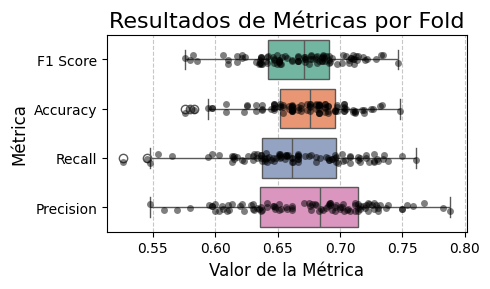

In [65]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

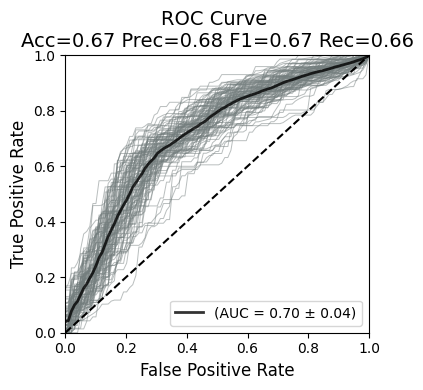

In [66]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [67]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.75)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [70.25, 185.25, 143.0, 252.16666666666666]
Desviación estándar de F-scores: [5.509461558688532, 9.505480875088155, 8.573214099741124, 9.388231403671774]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


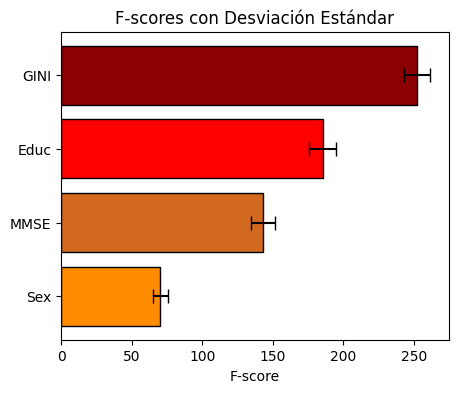

In [68]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [69]:
results_model['model'][0].get_booster().get_score()

{'Sex': 68.0, 'Educ': 182.0, 'MMSE': 134.0, 'GINI': 271.0}

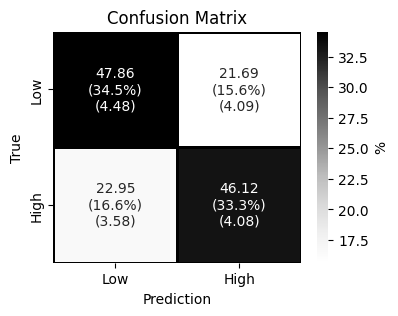

In [70]:
Plotters.C_Matrix(metrics_, threshold=0.65)